In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers1.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


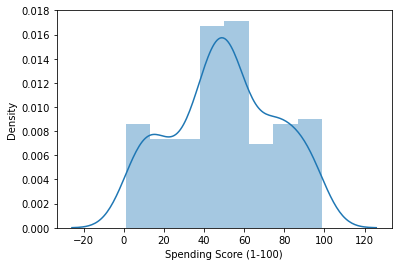

In [26]:
import seaborn as sns
sns.distplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


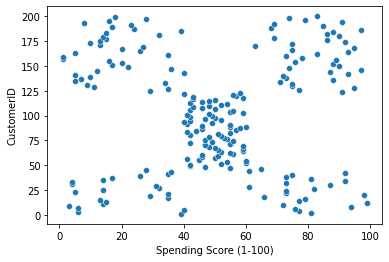

In [27]:
sns.scatterplot(df['Spending Score (1-100)'],df['CustomerID'])

In [28]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

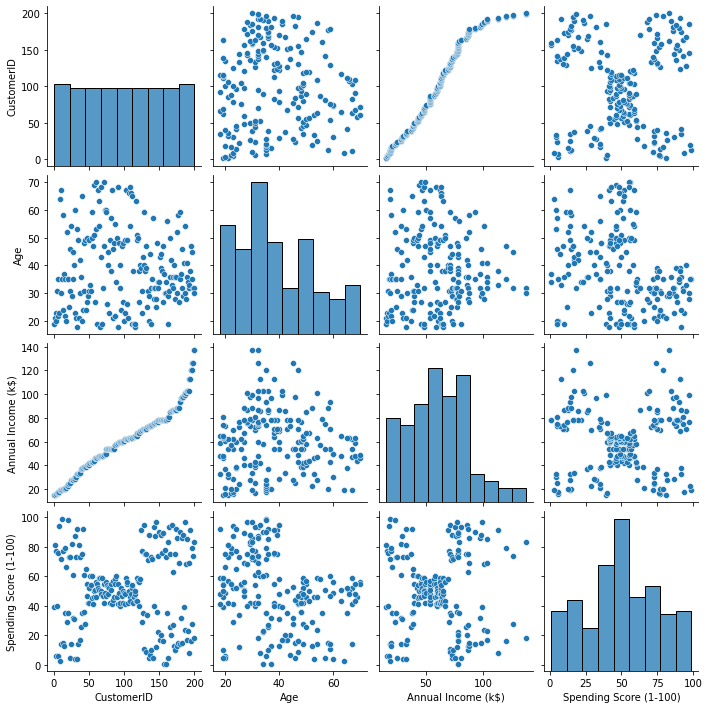

In [29]:
sns.pairplot(df)

In [30]:
x = df.iloc[:, 3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [31]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90dfd48190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90dfd48c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90dfd42c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f90dfd4c710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f90dfd4cc50>],
 'means': []}

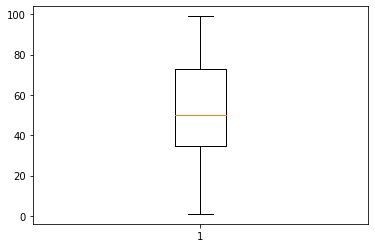

In [33]:
import matplotlib.pyplot as plt
plt.boxplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


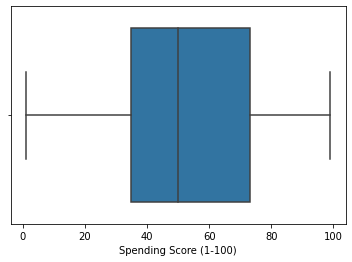

In [34]:
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']>upper_whisker,upper_whisker,np.where(df['Spending Score (1-100)']<lower_whisker,lower_whisker,df['Spending Score (1-100)']))
sns.boxplot(df['Spending Score (1-100)'],data=df)

In [35]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)    float64
dtype: object

In [37]:
categorical = df.select_dtypes(include=['object']).copy()
categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_categorical = categorical.apply(le.fit_transform)
df_categorical.head()

,Gender
0,1
1,1
2,0
3,0
4,0


In [39]:
num_features = df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]
numeric_data = pd.merge(num_features, df_categorical, left_index=True, right_index=True)
numeric_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39.0,1
1,2,21,15,81.0,1
2,3,20,16,6.0,0
3,4,23,16,77.0,0
4,5,31,17,40.0,0


In [40]:
finaldf = numeric_data.dropna()
finaldf = finaldf.drop(['CustomerID'],axis=1)
#indpendent variable
X = finaldf.drop(['Spending Score (1-100)'],axis=1)
#dependent variable
Y = finaldf['Spending Score (1-100)']

In [41]:
X

,Age,Annual Income (k$),Gender
0,19,15,1
1,21,15,1
2,20,16,0
3,23,16,0
4,31,17,0
...,...,...,...
195,35,120,0
196,45,126,0
197,32,126,1
198,32,137,1


In [42]:
Y

0      39.0
1      81.0
2       6.0
3      77.0
4      40.0
       ... 
195    79.0
196    28.0
197    74.0
198    18.0
199    83.0
Name: Spending Score (1-100), Length: 200, dtype: float64

In [43]:
numeric_data.shape

(200, 5)

In [44]:
from sklearn import cluster

In [45]:
error =[]

In [46]:
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(numeric_data)
    error.append(kmeans.inertia_)

In [47]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.3360761156]

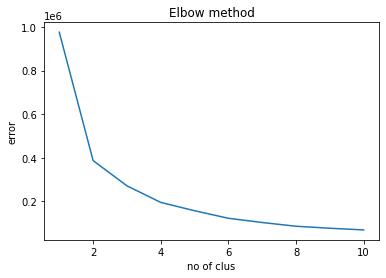

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [49]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [50]:
wcss

[176158.06,
 87170.74887218044,
 59535.81464767616,
 39551.60942422728,
 31707.780070267763,
 25447.38171106638,
 21833.159641988248,
 19163.863979698457,
 16041.685436381926,
 13842.573593486351]

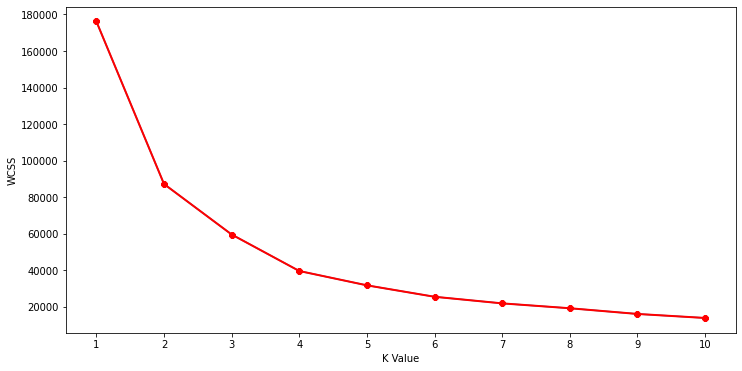

In [51]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [52]:
km_model=KMeans(n_clusters=3,init='k-means++',random_state=0)

In [53]:
km_model.fit(numeric_data)

KMeans(n_clusters=3, random_state=0)

In [54]:
ykmeans =km_model.predict(numeric_data)
ykmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [55]:
numeric_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39.0,1
1,2,21,15,81.0,1
2,3,20,16,6.0,0
3,4,23,16,77.0,0
4,5,31,17,40.0,0


In [56]:
#10. Add the cluster data with the primary dataset
#5 clusters
km1=cluster.KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39.0,0
1,2,Male,21,15,81.0,0
2,3,Female,20,16,6.0,0
3,4,Female,23,16,77.0,0
4,5,Female,31,17,40.0,0


In [57]:
from sklearn.model_selection import train_test_split
#split train data as 70% and test data as 30%
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3,random_state =0)

In [58]:
x_train.shape

(140, 3)

In [59]:
y_train.shape

(140,)

In [60]:
x_test

,Age,Annual Income (k$),Gender
18,52,23,1
170,40,87,1
107,54,63,1
98,48,61,1
177,27,88,1
182,46,98,1
5,22,17,0
146,48,77,1
12,58,20,0
152,44,78,0


In [61]:
y_test

18     29.0
170    13.0
107    46.0
98     42.0
177    69.0
182    15.0
5      76.0
146    36.0
12     15.0
152    20.0
61     55.0
125    77.0
180    32.0
154    16.0
80     51.0
7      94.0
33     92.0
130     9.0
37     73.0
74     47.0
183    88.0
145    97.0
45     65.0
159    73.0
60     56.0
123    91.0
179    90.0
185    97.0
122    58.0
44     28.0
16     35.0
55     41.0
150    17.0
111    54.0
22      5.0
189    85.0
129    75.0
4      40.0
83     44.0
106    50.0
134     5.0
66     50.0
26     32.0
113    46.0
168    27.0
63     59.0
8       3.0
75     54.0
118    43.0
143    87.0
71     42.0
124    29.0
184    39.0
97     50.0
149    90.0
24     14.0
30      4.0
160    35.0
40     35.0
56     50.0
Name: Spending Score (1-100), dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred = regressor.predict(x_test) 
y_pred

array([44.6306485 , 46.68864947, 41.5794567 , 44.42579631, 52.57064582,
       43.3612495 , 62.47872687, 43.57057789, 45.88174956, 49.1736032 ,
       58.46817723, 55.53665992, 51.35404153, 47.80388455, 40.6907984 ,
       61.96870283, 59.61961508, 44.34785768, 57.91747423, 39.77765263,
       54.95317346, 52.70203559, 60.38965578, 55.56562359, 35.1829601 ,
       48.10734307, 48.65080699, 50.61296451, 51.4809551 , 48.97533366,
       56.32947476, 45.84448991, 45.79999117, 61.38969259, 51.09336842,
       51.48990751, 48.45701365, 58.36957091, 49.54328505, 39.930767  ,
       56.56842328, 51.23371061, 51.38958786, 57.50605652, 52.34512593,
       46.26486003, 39.36557848, 54.84455783, 46.56555567, 54.75938013,
       49.35396792, 59.18924299, 49.42084769, 57.89746296, 49.90914713,
       47.28043189, 40.60390736, 43.64127743, 41.72361865, 47.79493214])

In [64]:
result = regressor.score(x_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 12.77%


In [65]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [66]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1 

In [67]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

In [68]:
precision = precision_score(y_test_classes, y_pred_classes)
print('Precision: %f' % precision)

Precision: 1.000000


In [69]:
recall = recall_score(y_test_classes, y_pred_classes)
print('Recall: %f' % recall)

Recall: 1.000000


In [70]:
f1 = f1_score(y_test_classes, y_pred_classes)
print('F1 score: %f' % f1)

F1 score: 1.000000
